Titanic data sets using knn:-

import some improtent libary

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

import data sets

In [3]:
tr1=pd.read_csv('titantrain.csv')

In [4]:
tr1.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


shape of the data sets

In [5]:
tr1.shape

(891, 12)

# information about the data sets

In [6]:
tr1.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


clean the data sets

remove passangerid,ticket,cabin,fare,name because the are all belong to the pclass

In [7]:
#clean the feature
tr1=tr1.drop('PassengerId',axis=1)
tr1=tr1.drop('Ticket',axis=1)
tr1=tr1.drop('Name',axis=1)
tr1=tr1.drop('Fare',axis=1)
tr1=tr1.drop('Cabin',axis=1)

In [8]:
tr1.shape

(891, 7)

In [9]:
tr1.describe()

,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594
std,0.486592,0.836071,14.526497,1.102743,0.806057
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


In [10]:
tr1.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.000,0.0,1.0,1.0
Pclass,891.0,2.308642,0.836071,1.00,2.000,3.0,3.0,3.0
Age,714.0,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,0.523008,1.102743,0.00,0.000,0.0,1.0,8.0
Parch,891.0,0.381594,0.806057,0.00,0.000,0.0,0.0,6.0


#remove null values

In [11]:
tr1.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      2
dtype: int64

remove null value using mean and median formula

In [12]:
tr1['Age']=tr1['Age'].fillna(tr1['Age'].median())
tr1['Embarked'].mode()

0    S
dtype: object

check the how many people are survived or not survived

0    549
1    342
Name: Survived, dtype: int64


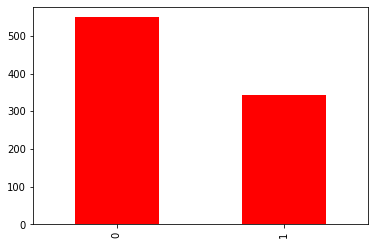

In [15]:
print(tr1.Survived.value_counts())
tr1.Survived.value_counts().plot(kind="bar",color='r')

check null values

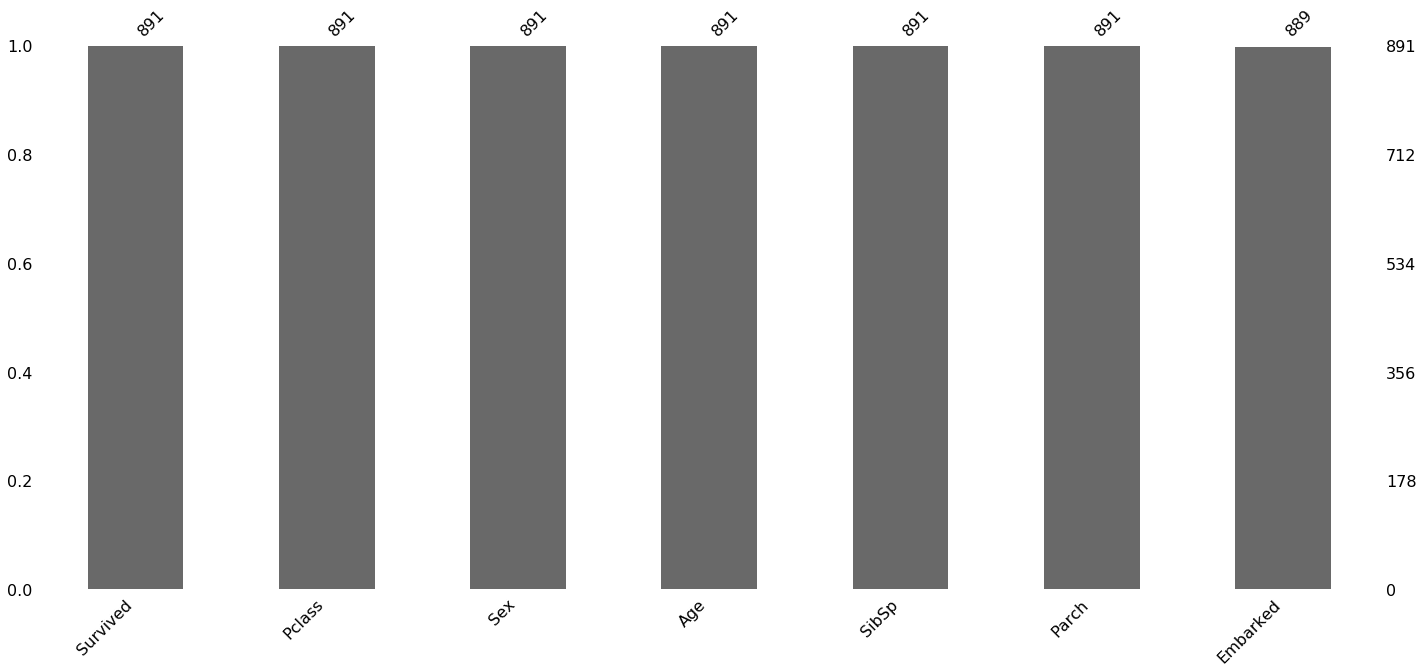

In [14]:
import missingno as msno
msno.bar(tr1)

creat one cateogrical value and put the sibsp parch on the value

In [17]:
tr1['persion']=tr1['SibSp']+tr1['Parch']+1
tr1=tr1.drop('SibSp',axis=1)

In [18]:
tr1=tr1.drop('Parch',axis=1)

# convert categoricalto numerical

In [19]:
tr1['Sex']=tr1.replace(['female', 'male'], [1,2])

In [20]:
tr1['Embarked']=tr1.replace(['Q','S','C'],[1,2,3])

# find relation among the different feature and survival

3    491
1    216
2    184
Name: Pclass, dtype: int64


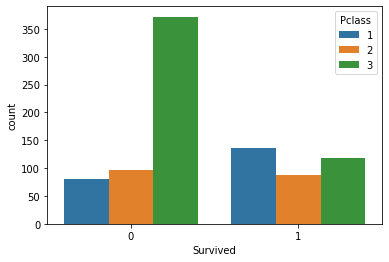

In [21]:
sns.countplot(x="Survived", hue="Pclass", data=tr1)
print(tr1.Pclass.value_counts())

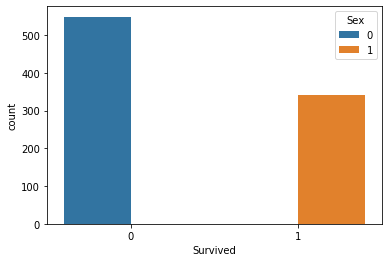

In [22]:
sns.countplot(x="Survived", hue="Sex", data=tr1)

pearson corrlation sofficent to find the relationship between the 1 means highly correlated 0 means not correlated


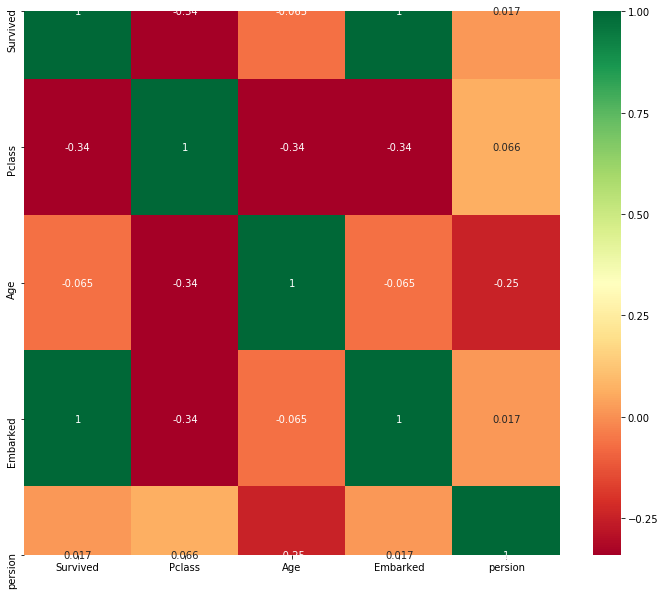

In [23]:
plt.figure(figsize=(12,10))
p=sns.heatmap(tr1.corr(),annot=True,cmap='RdYlGn')

In [24]:
#feature scaling the data to set the on one parameter
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
x=tr1.iloc[:,1:5].values
y=tr1.iloc[:,0].values
x=std.fit_transform(x)

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x, y, test_size=0.33, random_state=42)

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(7)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [27]:
#calculate the train score
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import metrics
train_score=[]
test_score=[]
train_score=[knn.score(X_train,y_train)]
test_score=[knn.score(X_test,y_test)]

In [28]:
max_train_score=max(train_score)
max_train_score

1.0

In [29]:
y_pred=knn.predict(X_test)

In [30]:
confusion_matrix(y_test,y_pred)

array([[175,   0],
       [  0, 120]], dtype=int64)

In [31]:
pd.crosstab(y_test,y_pred,rownames=['True'],colnames=['predicted'])

predicted,0,1
True,,
0,175,0
1,0,120


Text(0.5, 15.0, 'predicted label')

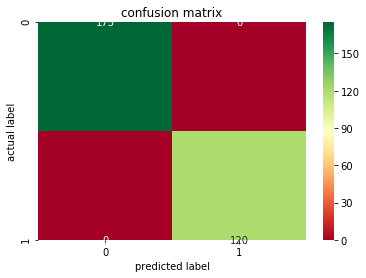

In [32]:
cnf_mat=metrics.confusion_matrix(y_test,y_pred)
p=sns.heatmap(pd.DataFrame(cnf_mat),annot=True,fmt='g',cmap='RdYlGn')
plt.title('confusion matrix',y=1.1)
plt.ylabel('actual label')
plt.xlabel('predicted label')

In [33]:
accuracy=accuracy_score(y_test,y_pred)*100

In [34]:
print(accuracy)

100.0


In [35]:
from sklearn.model_selection import cross_val_score
cross_val_score(knn,x,y,cv=10).mean()

1.0

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       175
           1       1.00      1.00      1.00       120

    accuracy                           1.00       295
   macro avg       1.00      1.00      1.00       295
weighted avg       1.00      1.00      1.00       295



In [37]:
from sklearn.model_selection import GridSearchCV
param=[{'n_neighbors':np.arange(1,50)}]
knn=KNeighborsClassifier(7)
knn_cv=GridSearchCV(knn,param,cv=5)
knn_cv.fit(x,y)
print('best score'+str(knn_cv.best_score_))
print('best parameters'+str(knn_cv.best_params_))

best score1.0
best parameters{'n_neighbors': 1}


#here we find the test model through knn regression

In [39]:
from sklearn.neighbors import KNeighborsRegressor

In [42]:
ts1=pd.read_csv('titantest.csv')
ts1.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [43]:
ts1.shape

(418, 11)

In [44]:
ts1.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 27.8+ KB


In [45]:
#here we remove remove name passengerid ticket fare cabin becaise the are belong to one group pclass
#clean the feature
ts1=ts1.drop('PassengerId',axis=1)
ts1=ts1.drop('Ticket',axis=1)
ts1=ts1.drop('Name',axis=1)
ts1=ts1.drop('Fare',axis=1)
ts1=ts1.drop('Cabin',axis=1)

In [46]:
tr1.describe()

,Survived,Pclass,Age,Embarked,persion
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.383838,1.904602
std,0.486592,0.836071,13.019697,0.486592,1.613459
min,0.000000,1.000000,0.420000,0.000000,1.000000
25%,0.000000,2.000000,22.000000,0.000000,1.000000
50%,0.000000,3.000000,28.000000,0.000000,1.000000
75%,1.000000,3.000000,35.000000,1.000000,2.000000
max,1.000000,3.000000,80.000000,1.000000,11.000000


In [47]:
ts1.shape

(418, 6)

In [48]:
ts1.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Embarked     0
dtype: int64

In [49]:
ts1['Age']=ts1['Age'].fillna(tr1['Age'].median())

In [50]:
ts1['Sex']=ts1.replace(['female', 'male'], [1,2])

In [51]:
ts1['Embarked']=ts1.replace(['Q','S','C'],[1,2,3])

In [52]:
from sklearn.neighbors import KNeighborsRegressor
knnr = KNeighborsRegressor(n_neighbors = 11)
knnr.fit(x, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                    weights='uniform')

In [53]:
print ("The MSE is:",format(np.power(y-knnr.predict(x),2).mean()))

The MSE is: 0.0
